In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import matplotlib.ticker as ticker
from sklearn import preprocessing

In [2]:
df = pd.read_csv('penbased-5an-nn.csv', header = None, sep=',')
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
1,99,80,63,100,25,76,79,68,100,62,97,23,54,0,0,16,9
2,0,73,19,99,72,100,70,73,32,48,5,18,46,0,100,72,2
3,12,77,20,62,78,40,50,0,1,17,0,64,23,98,100,100,5
4,0,98,36,42,80,85,68,42,56,0,25,23,50,37,100,32,7


In [3]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000
mean,39.505277,83.219159,41.046488,82.074509,49.764374,64.793031,51.261372,44.677584,56.449236,34.557041,60.086881,35.706423,54.602074,35.654021,47.381823,29.784934,4.431587
std,34.185374,19.044205,26.651870,21.033427,33.839527,27.323795,30.513046,29.884245,33.933970,27.598896,36.953507,27.481161,22.819585,33.126822,41.267376,35.721699,2.876947
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,75.000000,20.000000,70.000000,18.000000,48.000000,28.000000,23.000000,28.000000,8.000000,24.000000,12.000000,41.000000,6.000000,0.000000,0.000000,2.000000
50%,33.000000,88.000000,40.000000,89.000000,53.000000,70.000000,54.000000,43.000000,59.000000,34.000000,72.000000,31.000000,53.000000,28.000000,41.000000,11.000000,4.000000
75%,66.000000,100.000000,59.000000,100.000000,78.000000,86.000000,74.000000,65.000000,88.000000,55.000000,96.000000,57.000000,68.000000,51.000000,100.000000,55.000000,7.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,9.000000


In [4]:
df.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.000000,0.270335,0.253952,0.100083,-0.404851,-0.089432,-0.330658,-0.089241,-0.029766,-0.094864,0.173923,-0.099156,0.122924,-0.018918,-0.329582,0.030953,0.335619
1,0.270335,1.000000,-0.062490,0.151970,-0.240727,-0.187357,-0.256534,-0.294927,-0.066688,-0.246095,0.111370,-0.027100,0.096167,0.096668,-0.105416,0.105203,0.198060
2,0.253952,-0.062490,1.000000,0.360894,0.371526,0.402748,-0.170531,0.269797,-0.132522,-0.030975,-0.015425,-0.416876,-0.142400,-0.417420,-0.163612,-0.278020,0.231450
3,0.100083,0.151970,0.360894,1.000000,0.165842,0.546834,-0.028609,0.222433,-0.137490,-0.233875,-0.151956,-0.598830,-0.077215,-0.520989,0.090936,-0.307390,0.162288
4,-0.404851,-0.240727,0.371526,0.165842,1.000000,0.418285,0.392499,0.322133,-0.204193,0.043204,-0.291619,-0.275603,-0.311111,-0.254385,0.048434,-0.106677,0.035044
5,-0.089432,-0.187357,0.402748,0.546834,0.418285,1.000000,0.170619,0.699505,-0.031988,0.137813,-0.131214,-0.552569,-0.155968,-0.704015,0.081502,-0.527991,0.147160
6,-0.330658,-0.256534,-0.170531,-0.028609,0.392499,0.170619,1.000000,0.343613,0.397259,0.321034,-0.154084,0.087005,-0.326737,-0.078299,0.038929,-0.089508,-0.116979
7,-0.089241,-0.294927,0.269797,0.222433,0.322133,0.699505,0.343613,1.000000,0.269030,0.583498,0.104928,-0.211768,-0.110898,-0.657508,-0.120300,-0.647238,0.105537
8,-0.029766,-0.066688,-0.132522,-0.137490,-0.204193,-0.031988,0.397259,0.269030,1.000000,0.484246,0.551981,0.267771,-0.057306,-0.091988,-0.356297,-0.247163,-0.159584
9,-0.094864,-0.246095,-0.030975,-0.233875,0.043204,0.137813,0.321034,0.583498,0.484246,1.000000,0.349432,0.420669,0.026738,-0.197172,-0.300249,-0.411105,-0.043689


In [5]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
1,99,80,63,100,25,76,79,68,100,62,97,23,54,0,0,16,9
2,0,73,19,99,72,100,70,73,32,48,5,18,46,0,100,72,2
3,12,77,20,62,78,40,50,0,1,17,0,64,23,98,100,100,5
4,0,98,36,42,80,85,68,42,56,0,25,23,50,37,100,32,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10987,86,100,38,80,12,51,0,18,94,0,100,13,62,30,7,18,6
10988,0,92,48,100,76,74,70,41,57,9,38,0,46,80,100,20,7
10989,0,82,26,98,59,100,67,78,55,53,49,27,65,6,15,0,2
10990,5,90,55,100,78,84,90,65,71,51,100,23,52,5,0,0,3


In [6]:
df.columns = ['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10', 'a11', 'a12', 'a13', 'a14', 'a15', 'a16', 'class']

In [7]:
df.head()

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16,class
0,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
1,99,80,63,100,25,76,79,68,100,62,97,23,54,0,0,16,9
2,0,73,19,99,72,100,70,73,32,48,5,18,46,0,100,72,2
3,12,77,20,62,78,40,50,0,1,17,0,64,23,98,100,100,5
4,0,98,36,42,80,85,68,42,56,0,25,23,50,37,100,32,7


In [8]:
y = df['class']

In [9]:
X = df.drop(['class'], axis = 1)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Logistic

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn. metrics import classification_report, roc_auc_score, roc_curve

In [12]:
modellog1 = LogisticRegression()
modellog1.fit(X_train, y_train)
modellog1.score(X_train, y_train)

c:\program files\python36\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8478893740902474

In [13]:
modellog1.score(X_test, y_test)

0.8548034934497817

In [14]:
y_pred=modellog1.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[255,   0,   0,   0,   4,   4,   5,   0,  13,   4],
       [  0, 239,  27,   6,   1,  11,   1,   5,   2,  12],
       [  0,  21, 256,   2,   0,   4,   0,   5,   0,   0],
       [  0,   5,   0, 246,   0,   3,   0,   4,   3,   3],
       [  0,   1,   0,   1, 276,   2,   4,   2,   0,   3],
       [  2,  12,   0,  10,   0, 185,   7,  10,  22,  26],
       [  2,   0,   0,   0,   0,   3, 250,   1,   3,   0],
       [  0,  18,   4,   8,   3,   9,   1, 235,   2,   3],
       [ 15,   4,   2,   1,   1,  14,   2,   4, 205,   5],
       [  0,  11,   2,   9,  10,  11,   0,   0,   4, 202]], dtype=int64)

### NB

In [15]:
from sklearn.naive_bayes import MultinomialNB

In [16]:
modelnb1 = MultinomialNB()
modelnb1.fit(X_train, y_train)
modelnb1.score(X_train, y_train)

0.7621300339640951

In [17]:
modelnb1.score(X_test, y_test)

0.774745269286754

In [18]:
y_pred=modelnb1.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[258,   1,   0,   0,   0,   2,   9,   0,  14,   1],
       [  0, 189,  73,  10,   4,   1,   0,   9,   0,  18],
       [  0,  15, 253,   2,   0,   3,   0,  14,   1,   0],
       [  0,  21,   0, 238,   0,   0,   0,   1,   0,   4],
       [  2,   4,   0,   0, 269,   3,   3,   0,   0,   8],
       [  0,   0,   0,  47,   0, 108,   3,   0,  62,  54],
       [  2,   0,   1,   2,   2,   1, 246,   0,   2,   3],
       [  0,  34,   1,   3,   4,   9,   1, 227,   4,   0],
       [ 27,   1,   5,   8,   0,  12,   1,  14, 184,   1],
       [  0,  24,   0,  33,  26,   8,   0,   1,   0, 157]], dtype=int64)

#### not as good as Logistic

### KNN

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [20]:
for k in range(2,9):
    modelknn1 = KNeighborsClassifier(n_neighbors = k)
    modelknn1.fit(X_train, y_train)
    print("Accuracy is for Train data is", modelknn1.score(X_train, y_train), "for K-value =", k)
    print("Accuracy is for Test data is", modelknn1.score(X_test, y_test), "for K-value =", k)

Accuracy is for Train data is 0.9811984473556526 for K-value = 2
Accuracy is for Test data is 0.9563318777292577 for K-value = 2
Accuracy is for Train data is 0.9798641436196022 for K-value = 3
Accuracy is for Test data is 0.9657933042212519 for K-value = 3
Accuracy is for Train data is 0.9763464337700145 for K-value = 4
Accuracy is for Test data is 0.9647016011644832 for K-value = 4
Accuracy is for Train data is 0.9733139252789907 for K-value = 5
Accuracy is for Test data is 0.9647016011644832 for K-value = 5
Accuracy is for Train data is 0.9719796215429404 for K-value = 6
Accuracy is for Test data is 0.9643377001455604 for K-value = 6
Accuracy is for Train data is 0.9689471130519165 for K-value = 7
Accuracy is for Test data is 0.9661572052401747 for K-value = 7
Accuracy is for Train data is 0.9676128093158661 for K-value = 8
Accuracy is for Test data is 0.9625181950509462 for K-value = 8


#### choose k=3

In [21]:
modelknn1 = KNeighborsClassifier(n_neighbors = 3)
modelknn1.fit(X_train, y_train)
modelknn1.score(X_train, y_train)

0.9798641436196022

In [22]:
modelknn1.score(X_test, y_test)

0.9657933042212519

In [23]:
y_pred=modelknn1.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[281,   0,   0,   0,   0,   0,   2,   0,   2,   0],
       [  0, 283,  13,   2,   0,   1,   1,   2,   0,   2],
       [  0,   8, 275,   2,   0,   0,   0,   3,   0,   0],
       [  0,   2,   1, 258,   0,   2,   0,   0,   0,   1],
       [  0,   0,   0,   0, 288,   0,   1,   0,   0,   0],
       [  0,   1,   0,   4,   0, 264,   0,   0,   2,   3],
       [  1,   0,   1,   0,   0,   0, 257,   0,   0,   0],
       [  0,   8,   1,   2,   0,   0,   1, 269,   2,   0],
       [  5,   0,   0,   0,   0,   1,   0,   0, 247,   0],
       [  0,   3,   0,   5,   4,   3,   0,   0,   2, 232]], dtype=int64)

#### accuracy ~ 97% => model fits

### Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from IPython.display import Image
from sklearn import tree
import pandas as pd

In [25]:
clf = RandomForestClassifier(n_estimators=100)
modelrfo1 = clf.fit(X_train, y_train)
modelrfo1.score(X_train, y_train)

1.0

In [26]:
modelrfo1.score(X_test, y_test)

0.9759825327510917

In [27]:
y_pred=modelrfo1.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[283,   0,   0,   0,   0,   0,   0,   0,   2,   0],
       [  0, 289,  11,   1,   0,   0,   0,   1,   0,   2],
       [  0,   5, 280,   1,   0,   0,   0,   2,   0,   0],
       [  0,   1,   0, 262,   0,   0,   0,   0,   0,   1],
       [  0,   0,   0,   0, 287,   0,   2,   0,   0,   0],
       [  0,   1,   0,   4,   0, 265,   0,   0,   1,   3],
       [  1,   0,   0,   0,   0,   0, 258,   0,   0,   0],
       [  0,   4,   1,   1,   1,   1,   0, 274,   0,   1],
       [  6,   0,   1,   0,   0,   1,   0,   1, 244,   0],
       [  0,   0,   0,   3,   2,   2,   0,   0,   2, 240]], dtype=int64)

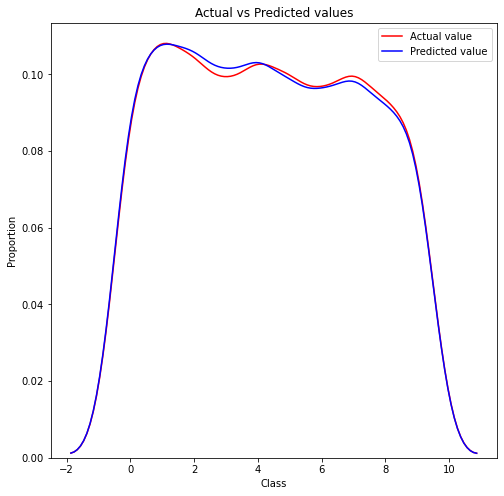

In [28]:
plt.figure(figsize=(8,8))
ax1 = sns.kdeplot(y_test, color='r', label='Actual value')
sns.kdeplot(y_pred, color='b', label='Predicted value', ax = ax1)
plt.title('Actual vs Predicted values')
plt.xlabel('Class')
plt.ylabel('Proportion')
plt.show()

#### choose model Random Forest

### use PCA to re-build model Random Forest

In [29]:
from sklearn.decomposition import PCA

In [30]:
pca = PCA(.95)

In [32]:
pca.fit(X_train)

PCA(n_components=0.95)

In [33]:
pca.n_components_

11

In [34]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [35]:
clf2 = RandomForestClassifier(n_estimators=100)

In [36]:
modelrfo2 = clf2.fit(X_train,y_train)
modelrfo2.score(X_train, y_train)

1.0

In [37]:
modelrfo2.score(X_test, y_test)

0.9403202328966521

In [38]:
y_pred=modelrfo2.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[282,   0,   0,   0,   0,   0,   1,   0,   2,   0],
       [  0, 263,  25,   4,   1,   0,   1,   4,   1,   5],
       [  0,   9, 268,   2,   0,   0,   0,   8,   1,   0],
       [  0,   2,   0, 249,   0,   4,   0,   0,   0,   9],
       [  1,   1,   0,   0, 278,   1,   4,   1,   0,   3],
       [  0,   1,   0,   5,   0, 254,   5,   0,   2,   7],
       [  2,   0,   1,   0,   0,   1, 255,   0,   0,   0],
       [  0,   8,   2,   2,   1,   1,   0, 267,   1,   1],
       [  3,   0,   1,   0,   0,   2,   0,   4, 242,   1],
       [  0,   3,   0,   4,   6,   7,   0,   2,   1, 226]], dtype=int64)

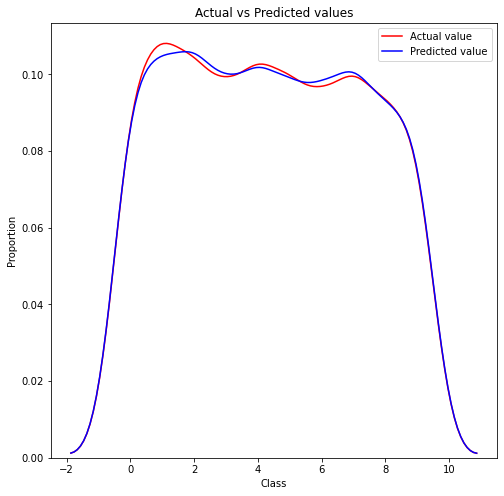

In [39]:
plt.figure(figsize=(8,8))
ax1 = sns.kdeplot(y_test, color='r', label='Actual value')
sns.kdeplot(y_pred, color='b', label='Predicted value', ax = ax1)
plt.title('Actual vs Predicted values')
plt.xlabel('Class')
plt.ylabel('Proportion')
plt.show()

#### => choose modelrfo1